In [230]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import plotly.express as px

In [231]:
df = pd.read_csv('Poverty_Hospitals_Mortality_Insurance.csv')

In [232]:
df.head()

,State,Deaths,Population,Crude Rate,Number_of_Hospitals,Staffed_Beds,Total_Discharges,Patient_Days,Gross_Patient_Revenue($),Employer Insurance,Non-Group Insurance,Medicaid Insurance,Medicare Insurance,Military Insurance,Uninsured,Average of All_Ages_SAIPE_Poverty_Universe,Average of All_Ages_in_Poverty_Count,Average of All_Ages_in_Poverty_Percent,Average of Median_Household_Income_in_Dollars
0,Alabama,266073,24388082,1091.0,90,15127,577473,2768330,63612420,0.4674,0.0598,0.1996,0.1554,0.0204,0.0976,4755140.2,808309.8,17.00,48197.4
1,Alaska,22287,3689104,604.1,10,1274,45131,243451,5881291,0.4726,0.0398,0.2074,0.0876,0.0596,0.1328,719958.4,75908.4,10.52,75141.6
2,Arizona,288220,35225769,818.2,78,13774,609674,2727388,86444904,0.4422,0.0600,0.2224,0.1540,0.0158,0.1056,6885729.4,1048566.8,15.26,56513.6
3,Arkansas,161185,15002360,1074.4,51,8011,316530,1388729,28471124,0.4176,0.0622,0.2656,0.1538,0.0154,0.0856,2911377.8,494977.0,17.00,45696.4
4,California,1328284,197000756,674.3,339,73849,3045511,14096066,457437847,0.4692,0.0728,0.2634,0.1082,0.0098,0.0762,38651294.2,5224283.8,13.54,71931.2


In [233]:
df_corr = df.drop(['Crude Rate', 'Staffed_Beds', 'Total_Discharges', 'Patient_Days', 'Gross_Patient_Revenue($)', 'Employer Insurance', 'Non-Group Insurance', 'Medicaid Insurance', 'Medicare Insurance', 'Military Insurance', 'Average of All_Ages_in_Poverty_Count', 'Average of All_Ages_in_Poverty_Percent', 'Average of Median_Household_Income_in_Dollars'], axis = 1)

In [234]:
df_corr['Uninsured_Population'] = df_corr['Uninsured'] * df_corr['Population']

In [235]:
df_corr.head()

,State,Deaths,Population,Number_of_Hospitals,Uninsured,Average of All_Ages_SAIPE_Poverty_Universe,Uninsured_Population
0,Alabama,266073,24388082,90,0.0976,4755140.2,2.380277e+06
1,Alaska,22287,3689104,10,0.1328,719958.4,4.899130e+05
2,Arizona,288220,35225769,78,0.1056,6885729.4,3.719841e+06
3,Arkansas,161185,15002360,51,0.0856,2911377.8,1.284202e+06
4,California,1328284,197000756,339,0.0762,38651294.2,1.501146e+07


In [236]:
df_corr.corr()

,Deaths,Population,Number_of_Hospitals,Uninsured,Average of All_Ages_SAIPE_Poverty_Universe,Uninsured_Population
Deaths,1.000000,0.978005,0.960784,0.203492,0.977445,0.856558
Population,0.978005,1.000000,0.957782,0.211987,0.999988,0.884802
Number_of_Hospitals,0.960784,0.957782,1.000000,0.328150,0.957071,0.919289
Uninsured,0.203492,0.211987,0.328150,1.000000,0.212607,0.495889
Average of All_Ages_SAIPE_Poverty_Universe,0.977445,0.999988,0.957071,0.212607,1.000000,0.884991
Uninsured_Population,0.856558,0.884802,0.919289,0.495889,0.884991,1.000000


In [237]:
df_corr.drop(['Population', 'Uninsured'], axis = 1, inplace=True)

In [238]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   State                                       51 non-null     object 
 1   Deaths                                      51 non-null     int64  
 2   Number_of_Hospitals                         51 non-null     int64  
 3   Average of All_Ages_SAIPE_Poverty_Universe  51 non-null     float64
 4   Uninsured_Population                        51 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [239]:
df_corr.rename(columns={'Average of All_Ages_SAIPE_Poverty_Universe': 'Poverty(10 Million)', 'Deaths': 'Deaths(1 Million)', 'Uninsured_Population': 'Uninsured_Population(10 Million)'}, inplace=True)

In [240]:
df_corr['Uninsured_Population(10 Million)'] = df_corr['Uninsured_Population(10 Million)'].astype(int)

In [241]:
df_corr['Uninsured_Population(10 Million)'] = df_corr['Uninsured_Population(10 Million)'].round(7)

In [242]:
df_corr.head()

,State,Deaths(1 Million),Number_of_Hospitals,Poverty(10 Million),Uninsured_Population(10 Million)
0,Alabama,266073,90,4755140.2,2380276
1,Alaska,22287,10,719958.4,489913
2,Arizona,288220,78,6885729.4,3719841
3,Arkansas,161185,51,2911377.8,1284202
4,California,1328284,339,38651294.2,15011457


In [243]:
fig = px.box(df_corr, y='Number_of_Hospitals')
fig.show()

In [244]:
fig = px.box(df_corr, y='Poverty(10 Million)')
fig.show()

In [245]:
fig = px.box(df_corr, y='Uninsured_Population(10 Million)')
fig.show()

In [246]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   State                             51 non-null     object 
 1   Deaths(1 Million)                 51 non-null     int64  
 2   Number_of_Hospitals               51 non-null     int64  
 3   Poverty(10 Million)               51 non-null     float64
 4   Uninsured_Population(10 Million)  51 non-null     int32  
dtypes: float64(1), int32(1), int64(2), object(1)
memory usage: 1.9+ KB


Text(0.5, 0.98, 'Scatter Matrix of Deaths, Number of Hospitals, Poverty Count, and Uninsured Population by State')

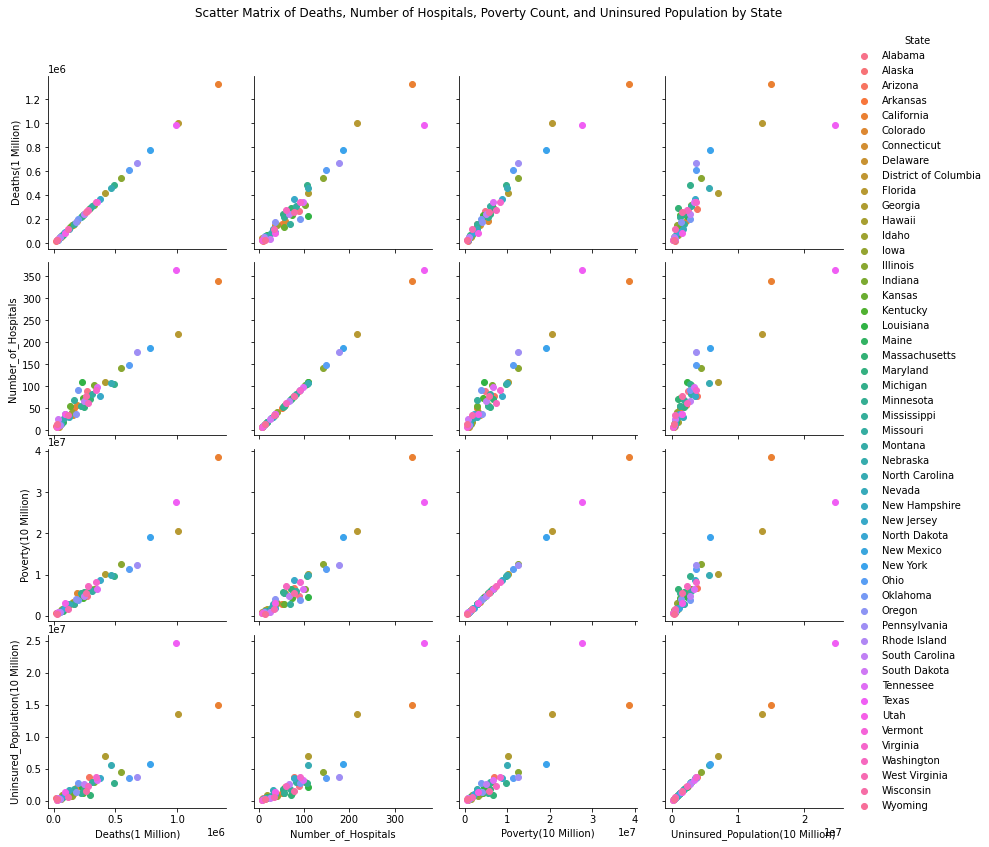

In [247]:
g = sns.PairGrid(data = df_corr , vars = ['Deaths(1 Million)', 'Number_of_Hospitals', 'Poverty(10 Million)', 'Uninsured_Population(10 Million)'], hue = 'State', height = 3 )

g.map(plt.scatter);
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Scatter Matrix of Deaths, Number of Hospitals, Poverty Count, and Uninsured Population by State')

In [248]:
df_corr.describe()

,Deaths(1 Million),Number_of_Hospitals,Poverty(10 Million),Uninsured_Population(10 Million)
count,5.100000e+01,51.000000,5.100000e+01,5.100000e+01
mean,2.738122e+05,75.823529,6.218378e+06,2.857211e+06
std,2.761139e+05,74.576593,7.139501e+06,4.248733e+06
min,2.228700e+04,7.000000,5.671358e+05,1.250910e+05
25%,7.841300e+04,26.000000,1.726637e+06,6.283940e+05
50%,2.010130e+05,58.000000,4.311804e+06,1.588187e+06
75%,3.318950e+05,94.500000,7.076616e+06,3.108596e+06
max,1.328284e+06,364.000000,3.865129e+07,2.462039e+07


In [249]:
df_corr.drop(['State'], axis = 1, inplace=True)

In [250]:
from sklearn.datasets import make_regression
y = df_corr.pop('Deaths(1 Million)')
X = df_corr
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# random_state number scores
# 42 = 0.7580687371586329
# 2 = 0.8561048428891151
# 1 = 0.9563103563671331
# 7 = 0.9545564926106106
# 423 = 0.9011974774991002

In [251]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [252]:
model.fit(X_train, y_train)

LinearRegression()

In [253]:
model.score(X_test, y_test)

0.9563103563671331

In [254]:

print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [ 1.63848258e+03  2.69756940e-02 -1.12908381e-02]
y-axis intercept:  16672.74060862948


In [255]:
X_string = ""
count = 0
for i, coef in enumerate(model.coef_):
    X_string += f"( {round(coef, 3)} X{i} )+\n"
equation = f'Our Equation is y = {model.intercept_} + {X_string}'
print(equation)

Our Equation is y = 16672.74060862948 + ( 1638.483 X0 )+
( 0.027 X1 )+
( -0.011 X2 )+



In [256]:
predictions = model.predict(X_test)

print(type(predictions))
print(predictions)

<class 'numpy.ndarray'>
[421936.84320116 288221.58845928 278871.55770201  68443.6596122
 121158.80482352 141663.50793545  70074.85223832  51194.34918753
  49531.21877681 102122.10579199 164272.07196507 127570.81591561
 286253.22562912]


In [257]:
code = {'Alabama': 'AL',
        'Alaska': 'AK',
        'Arizona': 'AZ',
        'Arkansas': 'AR',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'Delaware': 'DE',
        'District of Columbia': 'DC',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Hawaii': 'HI',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Iowa': 'IA',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Maine': 'ME',
        'Maryland': 'MD',
        'Massachusetts': 'MA',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Mississippi': 'MS',
        'Missouri': 'MO',
        'Montana': 'MT',
        'Nebraska': 'NE',
        'Nevada': 'NV',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'New York': 'NY',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Vermont': 'VT',
        'Virginia': 'VA',
        'Washington': 'WA',
        'West Virginia': 'WV',
        'Wisconsin': 'WI',
        'Wyoming': 'WY'}

In [258]:
df['Code'] = df['State'].map(code)

In [259]:
df.Code = df.Code.astype(str)

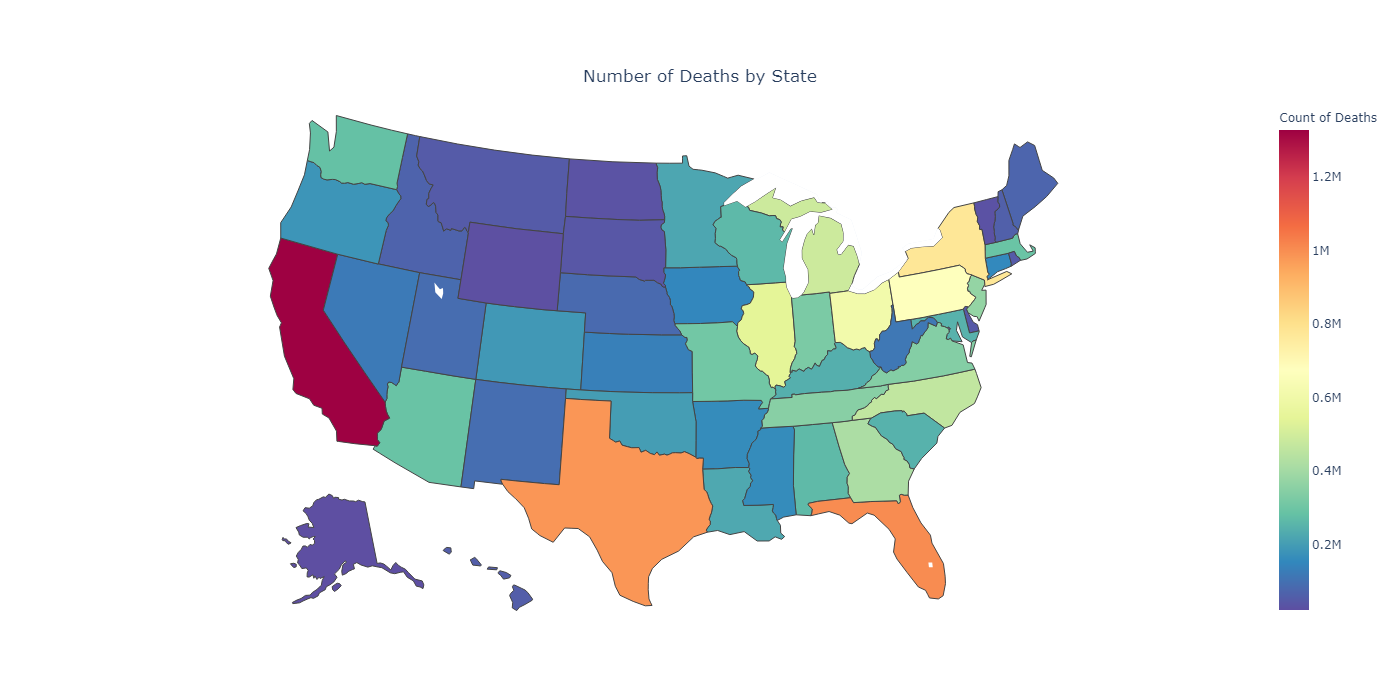

In [261]:
fig = px.choropleth(df,
                    locations='Code',
                    color='Deaths',
                    color_continuous_scale='spectral_r',
                    hover_name='State',
                    locationmode='USA-states',
                    labels={'Deaths':'Count of Deaths'},
                    scope='usa',
                    title = 'Number of Deaths by State'
                    )

fig.update_layout(
    title={        
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    width = 500)
fig.show(renderer='png', height=700, width=1400)